In [4]:
import os
import re
import numpy as np

import matplotlib.pyplot as plt
from collections import defaultdict

In [15]:
def get_throughput_latency_stats(log_dir):
    """
    Reads log files with lines of format:
    Time: <int>; ops_count: <int>, responseTime: <int>
    and computes:
      - Throughput (ops/sec)
      - Average latency per second (in milliseconds)
    """
    pattern = re.compile(r"^Time: (\d+); ops_count: \d+, responseTime: (\d+)$")

    ops_per_sec = defaultdict(int)
    latency_per_sec = defaultdict(list)

    max_t = -1

    for fname in sorted(os.listdir(log_dir)):
        if not fname.endswith(".txt"):
            continue

        with open(os.path.join(log_dir, fname)) as f:
            for line in f:
                line = line.strip()
                m = pattern.match(line)
                if m:
                    t = int(m.group(1))
                    # print(t)
                    # if t > 60:  # ignore timestamps beyond 60s
                    #     continue
                    if t> max_t:
                        max_t = t
                    resp_time_ns = int(m.group(2))
                    resp_time_ms = resp_time_ns / 1e6  # convert to ms

                    ops_per_sec[t] += 1
                    latency_per_sec[t].append(resp_time_ms)

    # Fill 0–60s range
    times = list(range(0, (max_t+1)))
    throughput = [ops_per_sec.get(t, 0) for t in times]
    avg_latency = [
        sum(latency_per_sec[t]) / len(latency_per_sec[t]) if latency_per_sec[t] else 0
        for t in times
    ]

    # print(f"Min time: {min(times)}")
    # print(f"Max time: {max(times)}")
    # print(f"Total ops counted: {sum(throughput)}")
    # print(f"Total latency samples: {sum(len(v) for v in latency_per_sec.values())}")
    print(np.max(times))
    print(folder, 'Avg Throuhput, Latency',np.sum(throughput) / np.max(times), np.sum(avg_latency) / np.max(times))

    return times, throughput, avg_latency





135471
../OptimisticReplicationOuts/project_0/ Avg Throuhput, Latency 1.0578795461759343 0.004019641874036659


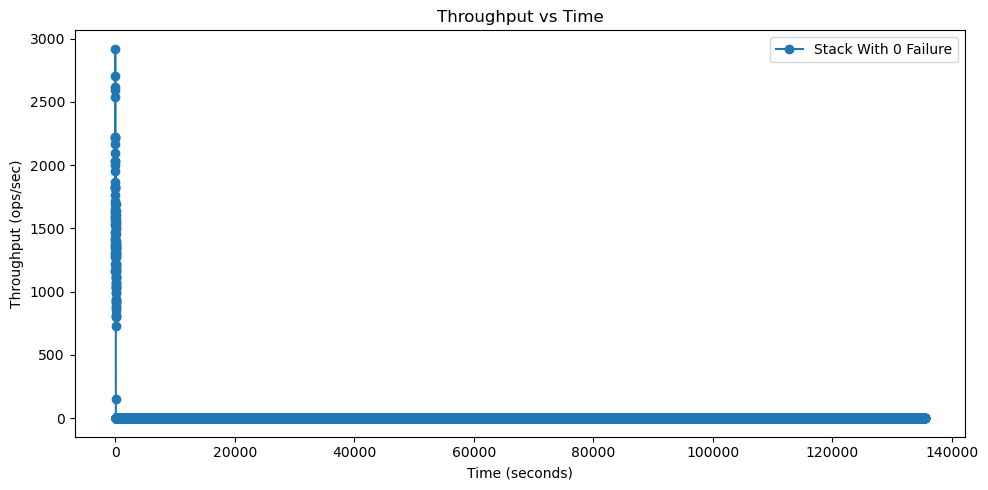

In [16]:
t, th, l = get_throughput_latency_stats('../OptimisticReplicationOuts/project_0/')


# ---- Plot ----
plt.figure(figsize=(10, 5))
plt.plot(t, th,'-o', label="Stack With 0 Failure")

plt.title("Throughput vs Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Throughput (ops/sec)")


plt.legend()
plt.tight_layout()
plt.show()

In [17]:
t[-1]

135471

In [65]:

# times, throughput, lats = [],[],[]

# for i in range(4):
    
#     folder = '../OptimisticReplicationOuts/stack_'+str(i)+'/'
#     t, th, l = get_throughput_latency_stats(folder)
#     times.append(t)
#     throughput.append(th)
#     lats.append(l)

# times, throughput, lats = [],[],[]

# for i in range(4):
    
#     folder = '../OptimisticReplicationOuts/set_'+str(i)+'/'
#     t, th, l = get_throughput_latency_stats(folder)
#     times.append(t)
#     throughput.append(th)
#     lats.append(l)
    
# times, throughput, lats = [],[],[]

# for i in range(4):
    
#     folder = '../OptimisticReplicationOuts/project_'+str(i)+'/'
#     t, th, l = get_throughput_latency_stats(folder)
#     times.append(t)
#     throughput.append(th)
#     lats.append(l)


# times, throughput, lats = [],[],[]

# for i in range(4):
    
#     folder = '../OptimisticReplicationOuts/movie_'+str(i)+'/'
#     t, th, l = get_throughput_latency_stats(folder)
#     times.append(t)
#     throughput.append(th)
#     lats.append(l)


times, throughput, lats = [],[],[]

for i in range(4):
    
    folder = '../OptimisticReplicationOuts/courseware_'+str(i)+'/'
    t, th, l = get_throughput_latency_stats(folder)
    times.append(t)
    throughput.append(th)
    lats.append(l)

41
../OptimisticReplicationOuts/courseware_0/ Avg Throuhput, Latency 1756.0731707317073 4.586443157602103
36
../OptimisticReplicationOuts/courseware_1/ Avg Throuhput, Latency 1850.861111111111 4.2894633371387165
35
../OptimisticReplicationOuts/courseware_2/ Avg Throuhput, Latency 1831.5714285714287 3.796336872358093
151
../OptimisticReplicationOuts/courseware_3/ Avg Throuhput, Latency 408.8344370860927 0.8235330944010335


In [67]:
failures = [0,1,2,3]

stack_thputs = [1142, 1215, 1237, 1242]
stack_lats = [5.63, 5.15, 4.69, 4.62]

set_thputs = [1411, 1481, 1437, 1458]
set_lats = [5.21, 4.82, 4.32, 4.37]

project_thputs = [1755, 1758, 1885]
project_lats = [4.58, 3.92, 3.68]

movie_thputs = [1799, 1814, 1770, 1834 ]
movie_lats = [4.47, 4.07, 3.90, 3.79]

course_thputs = [1756, 1850, 1831 ]
course_lats = [4.58, 4.28, 3.79]

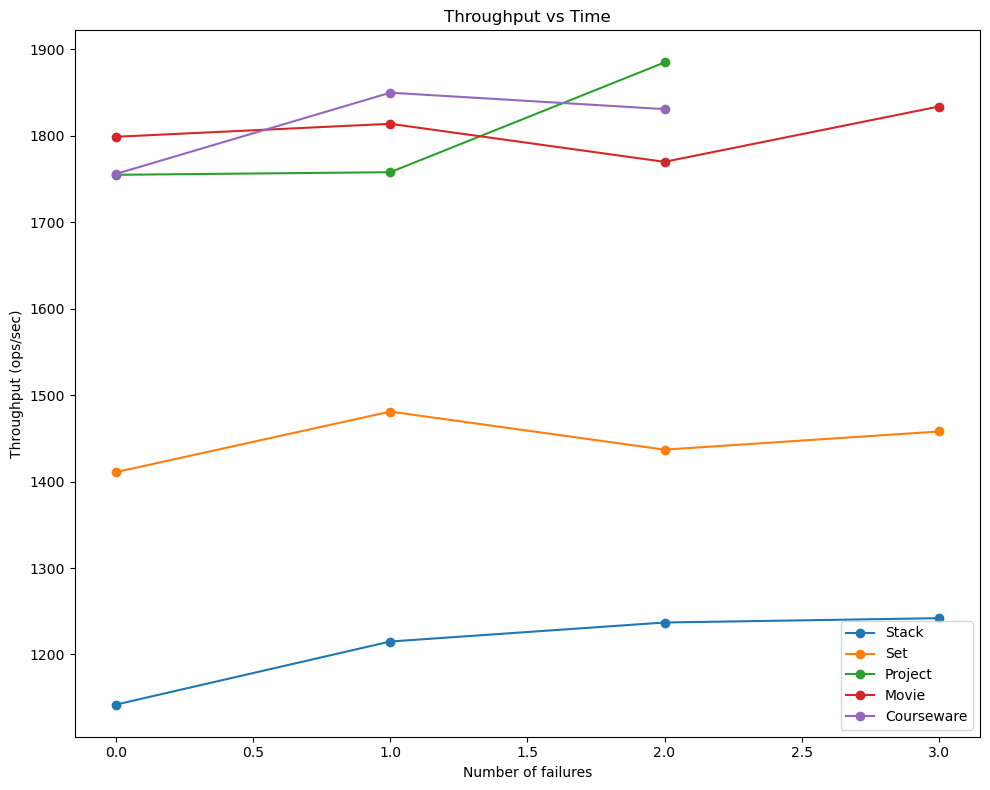

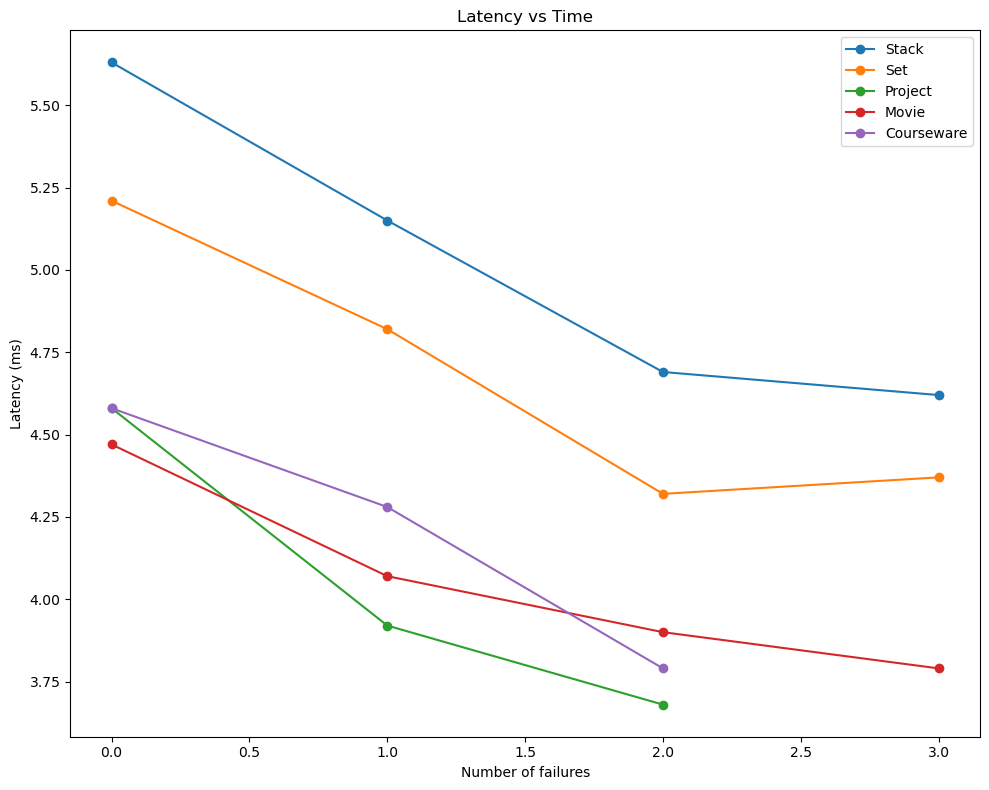

In [72]:
# ---- Plot ----
plt.figure(figsize=(10, 8))
plt.plot(failures, stack_thputs,'-o', label="Stack")
plt.plot(failures, set_thputs,'-o', label="Set")
plt.plot(failures[:-1], project_thputs,'-o', label="Project")
plt.plot(failures, movie_thputs,'-o', label="Movie")
plt.plot(failures[:-1], course_thputs,'-o', label="Courseware")


plt.title("Throughput vs Time")
plt.xlabel("Number of failures")
plt.ylabel("Throughput (ops/sec)")

# plt.xticks([-1,0,1,2,3,4])

plt.legend()
plt.tight_layout()
plt.savefig('../thput.png', dpi=150, bbox_inches='tight')
plt.show()


# ---- Plot ----
plt.figure(figsize=(10, 8))
plt.plot(failures, stack_lats,'-o', label="Stack")
plt.plot(failures, set_lats,'-o', label="Set")
plt.plot(failures[:-1], project_lats,'-o', label="Project")
plt.plot(failures, movie_lats,'-o', label="Movie")
plt.plot(failures[:-1], course_lats,'-o', label="Courseware")


# plt.xticks([-1,0,1,2,3,4])

plt.title("Latency vs Time")
plt.xlabel("Number of failures")
plt.ylabel("Latency (ms)")


plt.legend()
plt.tight_layout()
plt.savefig('../lat.png', dpi=150, bbox_inches='tight')
plt.show()

In [7]:
# import copy
# times1 = copy.deepcopy(times)
# throughput1 = copy.deepcopy(throughput)
# times2 = copy.deepcopy(times)
# throughput2 = copy.deepcopy(throughput)

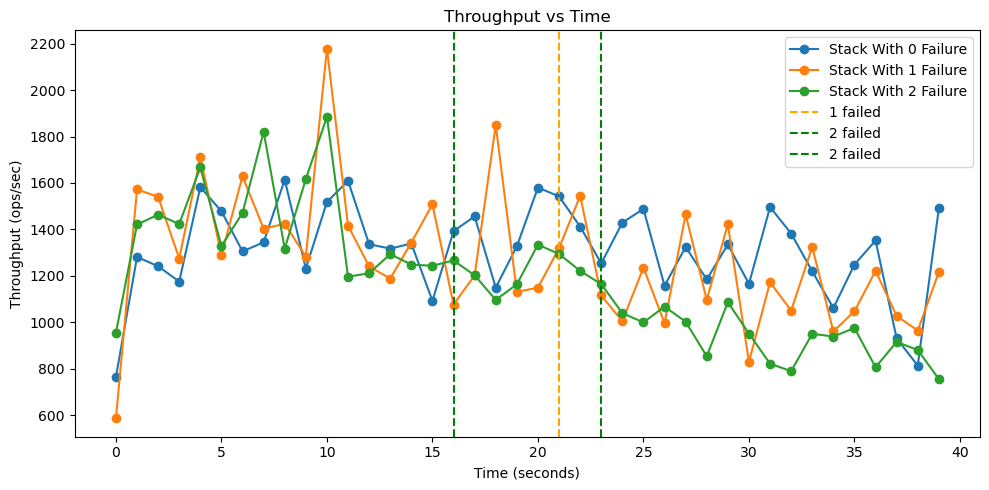

In [13]:
# ---- Plot ----
plt.figure(figsize=(10, 5))
plt.plot(times1[:40], throughput1[:40],'-o', label="Stack With 0 Failure")
plt.plot(times2[:40], throughput2[:40],'-o', label="Stack With 1 Failure")
plt.plot(times3[:40], throughput3[:40],'-o', label="Stack With 2 Failure")

plt.title("Throughput vs Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Throughput (ops/sec)")
plt.axvline(21, ls='--', color = 'orange', label = '1 failed')
plt.axvline(16, ls='--', color = 'g', label = '2 failed')
plt.axvline(23, ls='--', color = 'g', label = '2 failed')


plt.legend()
plt.tight_layout()
plt.savefig('../thput.png', dpi=150, bbox_inches='tight')
plt.show()

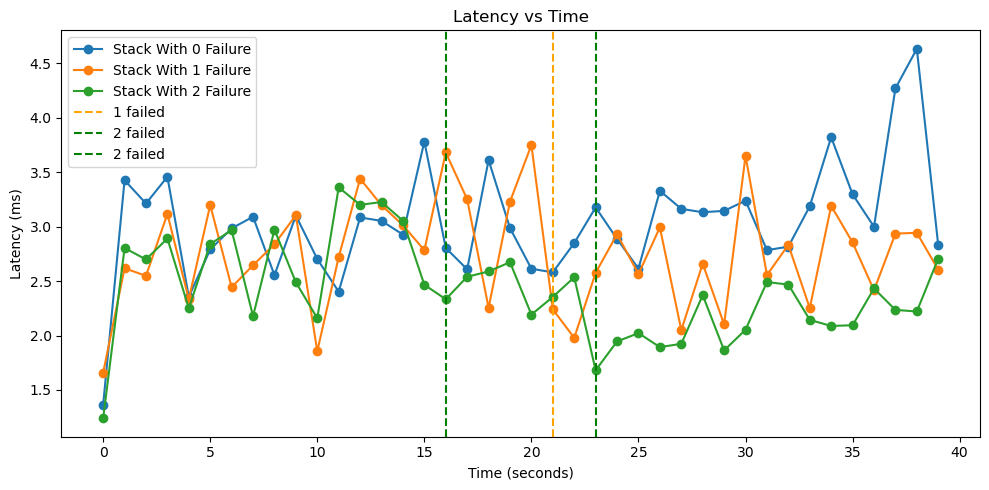

In [15]:
# ---- Plot ----
plt.figure(figsize=(10, 5))
plt.plot(times1[:40], (np.array(lats1)[:40]),'-o', label="Stack With 0 Failure")
plt.plot(times2[:40], (np.array(lats2)[:40]),'-o', label="Stack With 1 Failure")
plt.plot(times3[:40], (np.array(lats3)[:40]),'-o', label="Stack With 2 Failure")

plt.title("Latency vs Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Latency (ms)")
plt.axvline(21, ls='--', color = 'orange', label = '1 failed')
plt.axvline(16, ls='--', color = 'g', label = '2 failed')
plt.axvline(23, ls='--', color = 'g', label = '2 failed')


plt.legend()
plt.tight_layout()
plt.savefig('../lat.png', dpi=150, bbox_inches='tight')
plt.show()